In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set figure size for charts
figsize_x = 14
figsize_y = 6

In [2]:
# Read crime and unemployment csv File and store into Pandas data frame
crime_unemploy_data = pd.read_csv("crime_unemployment.csv")

#drop any nan or empty rows
crime_unemploy_data = crime_unemploy_data.dropna()

#create dataframe from csv file
crime_unemploy_data_df = pd.DataFrame(crime_unemploy_data)

#select columns to be used for analysis 
crime_unemploy_data_df = crime_unemploy_data_df[['State', 'Average Crime Rate', 'Labor Force', 'Unemployed']]

#display dataframe
crime_unemploy_data_df.head()

,State,Average Crime Rate,Labor Force,Unemployed
0,AK,289,356886,23510
1,AL,386,2198844,86493
2,AR,335,1351498,50038
3,AZ,353,3439758,166205
4,CA,416,19398212,815409


In [3]:
# Read tax, home price csv File and store into Pandas data frame
tax_homeprice_data = pd.read_csv("tax_homeprice.csv")

#drop any nan or empty rows
tax_homeprice_data = tax_homeprice_data.dropna()

#create dataframe from csv file
tax_homeprice_data_df = pd.DataFrame(tax_homeprice_data)

#rename Total Tax to Total State Tax, Annual Median to Annual Home Price
tax_homeprice_data_df = tax_homeprice_data_df.rename(columns={'Total Tax': 'Total State Tax', 
                                                              'Annual Median': 'Annual Home Price'})

#display dataframe
tax_homeprice_data_df.head()

,State,Total State Tax,Annual Home Price
0,AL,11055577.0,133891.67
1,AK,1641733.0,310387.50
2,AZ,16293917.0,240816.67
3,AR,9843173.0,127237.50
4,CA,175016884.0,560075.00


,State,Annual Wages per Employee
0,AK,47350.0
1,AL,38297.0
2,AR,35358.0
3,AZ,43133.5
4,CA,45431.0


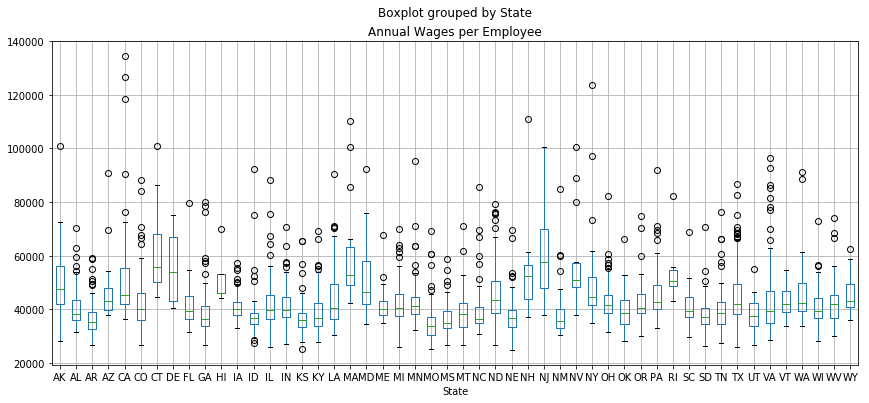

In [4]:
# Read salary csv File and store into Pandas data frame
salary_data = pd.read_csv("salary.csv")

#drop any nan or empty rows
salary_data = salary_data.dropna()

#create dataframe from csv file
salary_data_df = pd.DataFrame(salary_data)

# Create a boxplots to visualize the spread for wages
salary_data_df.boxplot("Annual Wages per Employee", by="State", figsize=(figsize_x, figsize_y))

#select columns to be used for analysis 
salary_data_df = salary_data_df[['Annual Wages per Employee', 'State']]

#groupby by State and calculate median for numeric columns
salary_data_df = salary_data_df.groupby(['State']).median()

#reset index
salary_data_df = salary_data_df.reset_index()

#round Annual Average Employment since can't have it in decimal points
salary_data_df = salary_data_df.round({'Annual Average Employment': 0})

#display dataframe
salary_data_df.head()

In [5]:
#merge all 3 dataframes
overall_df = pd.merge(crime_unemploy_data_df, tax_homeprice_data_df, on="State", how="outer")
overall_df = pd.merge(overall_df, salary_data_df, on="State", how="outer")

#drop row if NaN exists
overall_df = overall_df.dropna()

#display dataframe
overall_df.head()

,State,Average Crime Rate,Labor Force,Unemployed,Total State Tax,Annual Home Price,Annual Wages per Employee
0,AK,289,356886,23510,1641733.0,310387.50,47350.0
1,AL,386,2198844,86493,11055577.0,133891.67,38297.0
2,AR,335,1351498,50038,9843173.0,127237.50,35358.0
3,AZ,353,3439758,166205,16293917.0,240816.67,43133.5
4,CA,416,19398212,815409,175016884.0,560075.00,45431.0


In [6]:
overall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 7 columns):
State                        50 non-null object
Average Crime Rate           50 non-null int64
Labor Force                  50 non-null int64
Unemployed                   50 non-null int64
Total State Tax              50 non-null float64
Annual Home Price            50 non-null float64
Annual Wages per Employee    50 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.1+ KB


In [7]:
overall_df['Crime Rate / Labor Force'] = overall_df['Average Crime Rate']/overall_df['Labor Force']*100
overall_df['Unemployed / Labor Force'] = overall_df['Unemployed']/overall_df['Labor Force']*100

#Weight Summed Analysis to rank 
no_of_metrics = 6

#Assigning weightage for each attribute
metric_weightage = 1/no_of_metrics

#Get the max for Temp High, Temp Low and Percipitation Inches but min for Snow Inches as snow condition is less favorable
crime_rate_min = overall_df['Average Crime Rate'].min()
labor_force_max = overall_df['Labor Force'].max()
unemployed_min = overall_df['Unemployed'].min()
total_state_tax_min = overall_df['Total State Tax'].min()
home_price_min = overall_df['Annual Home Price'].min()
wages_max = overall_df['Annual Wages per Employee'].max()

#calculate Weighted Sum Analysis for each climate attribute and sum them to get a final value
overall_df['Crime Rate WSA'] = overall_df['Average Crime Rate']/crime_rate_min*metric_weightage
overall_df['Labor Force WSA'] = overall_df['Labor Force']/labor_force_max*metric_weightage
overall_df['Unemployed WSA'] = overall_df['Unemployed']/unemployed_min*metric_weightage
overall_df['Total State Tax WSA'] = overall_df['Total State Tax']/total_state_tax_min*metric_weightage
overall_df['Home Price WSA'] = overall_df['Annual Home Price']/home_price_min*metric_weightage
overall_df['Wages WSA'] = overall_df['Annual Wages per Employee']/wages_max*metric_weightage

overall_df['Total WSA'] = overall_df['Crime Rate WSA']+overall_df['Labor Force WSA']+overall_df['Unemployed WSA']+overall_df['Total State Tax WSA']+overall_df['Home Price WSA']+overall_df['Wages WSA']

#display dataframe
overall_df.head()

,State,Average Crime Rate,Labor Force,Unemployed,Total State Tax,Annual Home Price,Annual Wages per Employee,Crime Rate / Labor Force,Unemployed / Labor Force,Crime Rate WSA,Labor Force WSA,Unemployed WSA,Total State Tax WSA,Home Price WSA,Wages WSA,Total WSA
0,AK,289,356886,23510,1641733.0,310387.50,47350.0,0.080978,6.587538,0.776882,0.003066,0.424844,0.166667,0.509291,0.137334,2.018083
1,AL,386,2198844,86493,11055577.0,133891.67,38297.0,0.017555,3.933567,1.037634,0.018892,1.562995,1.122348,0.219693,0.111076,4.072638
2,AR,335,1351498,50038,9843173.0,127237.50,35358.0,0.024787,3.702410,0.900538,0.011612,0.904225,0.999267,0.208774,0.102552,3.126967
3,AZ,353,3439758,166205,16293917.0,240816.67,43133.5,0.010262,4.831881,0.948925,0.029554,3.003452,1.654138,0.395138,0.125104,6.156310
4,CA,416,19398212,815409,175016884.0,560075.00,45431.0,0.002145,4.203527,1.118280,0.166667,14.735065,17.767494,0.918984,0.131768,34.838256


In [8]:
#sort dataframe by lowest WSA
overall_df = overall_df.sort_values(by=['Total WSA'])

#display dataframe
overall_df.head(50)

,State,Average Crime Rate,Labor Force,Unemployed,Total State Tax,Annual Home Price,Annual Wages per Employee,Crime Rate / Labor Force,Unemployed / Labor Force,Crime Rate WSA,Labor Force WSA,Unemployed WSA,Total State Tax WSA,Home Price WSA,Wages WSA,Total WSA
41,SD,99,459462,13860,1917548.0,201525.000,37213.0,0.021547,3.016572,0.266129,0.003948,0.250461,0.194667,0.330667,0.107932,1.153804
46,VT,119,346061,9223,3284231.0,198525.000,42103.0,0.034387,2.665137,0.319892,0.002973,0.166667,0.333411,0.325745,0.122115,1.270803
50,WY,155,289576,11755,1837401.0,220241.665,43045.5,0.053527,4.059383,0.416667,0.002488,0.212422,0.186531,0.361378,0.124849,1.304334
28,ND,94,404302,10546,4205184.0,192150.000,43479.0,0.023250,2.608446,0.252688,0.003474,0.190574,0.426905,0.315284,0.126106,1.315032
29,NE,62,1020205,28513,5393093.0,164125.000,36641.5,0.006077,2.794830,0.166667,0.008765,0.515252,0.547500,0.269300,0.106275,1.613759
26,MT,183,528250,19659,2944827.0,225283.330,38282.0,0.034643,3.721533,0.491935,0.004539,0.355253,0.298955,0.369650,0.111033,1.631365
30,NH,160,761750,19239,2920888.0,250870.835,52241.0,0.021004,2.525632,0.430108,0.006545,0.347663,0.296525,0.411635,0.151519,1.643995
21,ME,116,698749,23527,4410632.0,216150.000,39987.0,0.016601,3.367017,0.311828,0.006004,0.425151,0.447762,0.354664,0.115978,1.661386
39,RI,158,555807,22636,3483100.0,281462.500,50350.0,0.028427,4.072637,0.424731,0.004775,0.409050,0.353600,0.461830,0.146035,1.800021
13,ID,157,857054,24321,4848359.0,216508.330,36549.0,0.018319,2.837744,0.422043,0.007364,0.439499,0.492199,0.355252,0.106006,1.822363


In [10]:
#save dataframe to csv file
overall_df.to_csv('final_choice_state.csv', index=False)